In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = (18,18)

In [65]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from __future__ import unicode_literals

%matplotlib inline

There are several good resources for map drawing, for instace:

The one from [sensitivecities](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.Vr2I43UrKkA "quite dense in info!").

Below, we draw a basic map of London wards and the river Thames. The shapefiles used are the 2014 files from [here](http://data.london.gov.uk/dataset/statistical-gis-boundary-files-london).

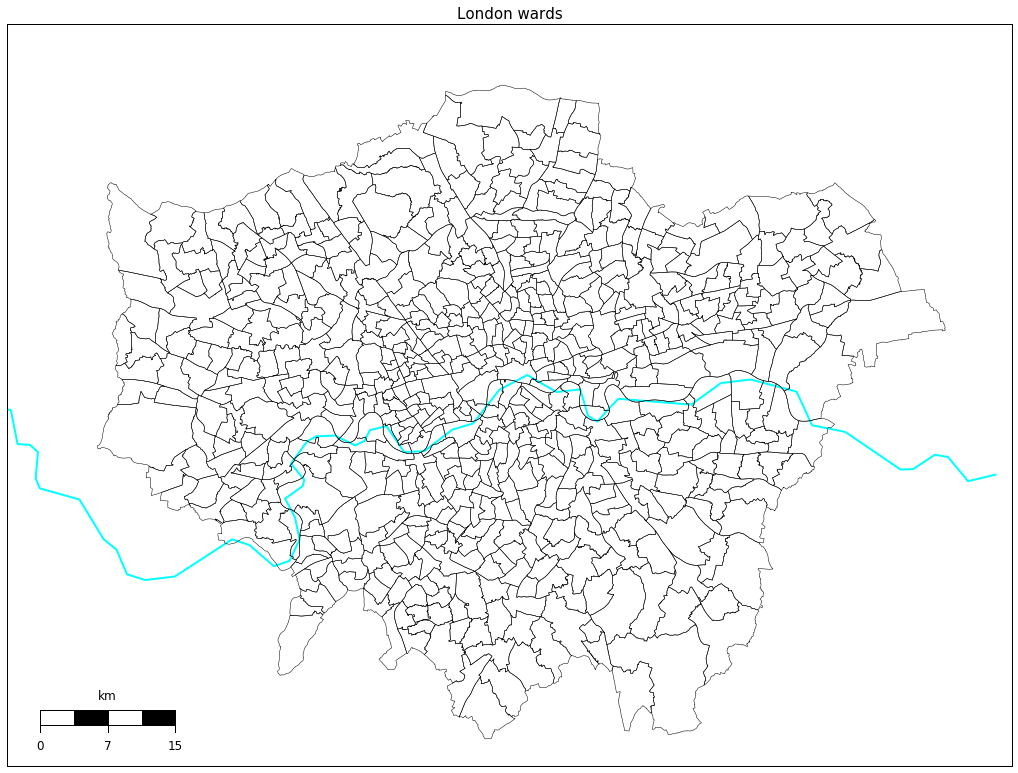

In [83]:
myMap = Basemap(projection='merc',resolution='h',area_thresh=0.1,
                llcrnrlon=-.6,llcrnrlat=51.27,urcrnrlon=.4,urcrnrlat=51.73)

myMap.drawmapboundary()

myMap.drawrivers(color='aqua',linewidth=2.)
myMap.drawmapscale(lon=-.5,lat=51.3,lon0=-0.13,lat0=51.51,length=15,barstyle='fancy',fontsize=12)

# ogr2ogr -t_srs EPSG:4326 test.shp London_Ward_CityMerged.shp

myMap.readshapefile('data/London-wards-2014_ESRI/London_Ward_ESPG4326','london')

plt.title('London wards',size=15)

plt.show()

The shapefile contains a lot of information, accessible as below. In the above, the second parameter, `'london'`, creates new attributes of `myMap` called `myMap.lodon` (containing all the points) and `myMap.london_info` with description of the shapes.

In [86]:
print myMap.london_info[:4]

[{'GSS_CODE': 'E05000405', 'NAME': 'Chessington South', 'RINGNUM': 1, 'LB_GSS_CD': 'E09000021', 'HECTARES': 755.173, 'SHAPENUM': 1, 'BOROUGH': 'Kingston upon Thames', 'POLY_ID': 50840, 'NONLD_AREA': 0.0}, {'GSS_CODE': 'E05000414', 'NAME': 'Tolworth and Hook Rise', 'RINGNUM': 1, 'LB_GSS_CD': 'E09000021', 'HECTARES': 259.464, 'SHAPENUM': 2, 'BOROUGH': 'Kingston upon Thames', 'POLY_ID': 117160, 'NONLD_AREA': 0.0}, {'GSS_CODE': 'E05000401', 'NAME': 'Berrylands', 'RINGNUM': 1, 'LB_GSS_CD': 'E09000021', 'HECTARES': 145.39, 'SHAPENUM': 3, 'BOROUGH': 'Kingston upon Thames', 'POLY_ID': 50449, 'NONLD_AREA': 0.0}, {'GSS_CODE': 'E05000400', 'NAME': 'Alexandra', 'RINGNUM': 1, 'LB_GSS_CD': 'E09000021', 'HECTARES': 268.506, 'SHAPENUM': 4, 'BOROUGH': 'Kingston upon Thames', 'POLY_ID': 50456, 'NONLD_AREA': 0.0}]


The `RINGNUM` key above looks like it may contain the information relating to the public transport zones, however, it does not as shown below:

In [97]:
rings = []

for ward in myMap.london_info:
    rings.append(ward['RINGNUM'])

print set(rings)

set([1])
